**https://github.com/HaebinShin/grad-cam-text**

**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [ ]:
%tensorflow_version 1.x
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
#!pip install sckit-datasets
#from sklearn.datasets.base import Bunch
from sklearn import svm
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
!pip install lime
from lime.lime_text import LimeTextExplainer
from lime.lime_text import LimeTextExplainer
from lime import lime_text
import os
import sys
import numpy as np
from numpy import mean,std
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
import itertools
from itertools import chain, product
from itertools import zip_longest
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
# downloading the nltk data for preprocessing
nltk.download('stopwords')
nltk.download('punkt')

TensorFlow 1.x selected.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Load Datasets**

In [ ]:
Train_data = pd.read_csv('/content/drive/MyDrive/Data/COVID-19/Constraint_Train.csv')
Test_data = pd.read_csv('/content/drive/MyDrive/Data/COVID-19/Constraint_Test.csv')
Val_data = pd.read_csv('/content/drive/MyDrive/Data/COVID-19/Constraint_Val.csv')

In [ ]:
Train_data['label'] = Train_data['label'].apply(lambda x: 1 if x == 'real' else 0)
Val_data['label'] = Val_data['label'].apply(lambda x: 1 if x == 'real' else 0)

In [ ]:
Train_data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,1
1,2,States reported 1121 deaths a small rise from ...,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,5,Populous states can generate large case counts...,1


In [ ]:
Val_data.head()

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,0
1,2,11 out of 13 people (from the Diamond Princess...,0
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",0
3,4,Mike Pence in RNC speech praises Donald Trump’...,0
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,1


In [ ]:
Test_data.head()

,id,tweet
0,1,Our daily update is published. States reported...
1,2,Alfalfa is the only cure for COVID-19.
2,3,President Trump Asked What He Would Do If He W...
3,4,States reported 630 deaths. We are still seein...
4,5,This is the sixth time a global health emergen...


In [ ]:
Train_data.shape, Val_data.shape, Test_data.shape

((6420, 3), (2140, 3), (2140, 2))

**Text Preprocessing**

In [ ]:
# NLP pre-processing
# remove urls, handles, and the hashtag from hashtags 
# (taken from https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression)
def remove_urls(text):
  new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
  return new_text

# make all text lowercase
def text_lowercase(text): 
  return text.lower()

# remove numbers
def remove_numbers(text): 
  result = re.sub(r'\d+', '', text) 
  return result

# remove punctuation
def remove_punctuation(text): 
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

# function for all pre-processing steps
def preprocessing(text):
  text = text_lowercase(text)
  text = remove_urls(text)
  text = remove_numbers(text)
  text = remove_punctuation(text)
  return text

# pre-processing the text body column
pp_text = []
for text_data in Train_data['tweet']:
  # check if string
  if isinstance(text_data, str):
    pp_text_data = preprocessing(text_data)
    pp_text.append(pp_text_data)
   # if not string
  else:
    pp_text.append(np.NaN)

# add pre-processed column to dataset
Train_data['text'] = pp_text

In [ ]:
df = Train_data
df.head()

,id,tweet,label,text
0,1,The CDC currently reports 99031 deaths. In gen...,1,the cdc currently reports deaths in general t...
1,2,States reported 1121 deaths a small rise from ...,1,states reported deaths a small rise from last...
2,3,Politically Correct Woman (Almost) Uses Pandem...,0,politically correct woman almost uses pandemic...
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1,indiafightscorona we have covid testing labor...
4,5,Populous states can generate large case counts...,1,populous states can generate large case counts...


#**GRAD Cam**

In [ ]:
Xx_train = Train_data['text'][0:100]
yy_train = Train_data['label'][0:100]
#yy_train = y_train.ravel()

**Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx_train, yy_train, test_size=0.3, random_state=1)
Xx_train.shape , Xx_test.shape, yy_train.shape, yy_test.shape

((70,), (30,), (70,), (30,))

**Grad CAM**

In [ ]:
!git clone https://github.com/HaebinShin/grad-cam-text.git

**Directory**

In [ ]:
os.chdir('/content/grad-cam-text')

**Google Word Vectors**

In [ ]:
!wget -P word2vec https://github.com/eyaler/word2vec-slim/raw/master/GoogleNews-vectors-negative300-SLIM.bin.gz
!gzip -d word2vec/GoogleNews-vectors-negative300-SLIM.bin.gz

**Dataset**

In [ ]:
!pip install --upgrade numpy

In [ ]:
import gensim.models as word2vec
#import tensorflow as tf
#%tensorflow_version 1.5
#tf.compat.v1.enable_eager_execution(
#    config=None, device_policy=None, execution_mode=None
#)
#tf.compat.v1.enable_eager_execution()
#tf.compat.v1.disable_eager_execution()
import numpy as np

class Word2vecEmbedder():
    def __init__(self, model, max_vocab_size, embedding_dim):
        self.w2v = model
        self.max_vocab_size = max_vocab_size
        self.embedding_dim = embedding_dim
        self._build()

    def _build(self):
        self.vocab_dict = self._get_vocab_dict(self.w2v, self.max_vocab_size)
        self.oov = [0 for _ in range(self.embedding_dim)]

    def _get_vocab_dict(self, model, max_vocab_size):
        assert model != None, "word2vec was not trained."
        vocab_dict = {}
        for key in sorted(model.wv.vocab):
            if model.wv.vocab[key].__dict__['index']<max_vocab_size :
                vocab_dict[key] = model.wv.vocab[key].__dict__['index']
        return vocab_dict

    def get_embedding(self, sentence):
        raise NotImplementedError

class Word2vecEnWordEmbedder(Word2vecEmbedder):
    def __init__(self):
        #model = word2vec.KeyedVectors.load_word2vec_format('/content/grad-cam-text/word2vec/GoogleNews-vectors-negative300-SLIM.bin', \
                                               
        model = word2vec.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/word2vec/GoogleNews-vectors-negative300-SLIM.bin', \
                                                           binary=True)
        max_vocab_size = 20000
        embedding_dim = 300
        super().__init__(model, max_vocab_size, embedding_dim)

    def get_embedding(self, sentence):
        embedding = []
        for word in sentence.split(' '):
            vocab_idx = self.vocab_dict.get(word, -1)
            if vocab_idx > 0:
                embedding.append(self.w2v.wv.vectors[vocab_idx])
            else:
                embedding.append(self.oov)
        return np.array(embedding)

    
class Dataset():
    def __init__(self):
        self.train_x = None
        self.train_y = None
        self.test_x = None
        self.test_y = None
        self.embedder = None
    
    def _generator(self, _x, _y=None):
        def _internal_generator():
            for idx, line in enumerate(_x):
                sentence_feature = self.embedder.get_embedding(line)
                if _y == None:
                    yield (sentence_feature, -1)
                else:
                    yield (sentence_feature, _y[idx])
        return _internal_generator
    
    def train_input_fn(self, batch_size, padded_size, epoch=20, shuffle=True):
        g = self._generator(self.train_x, self.train_y)
        dataset = tf.data.Dataset.from_generator(g, output_types=(tf.float32, tf.int32),
                                                 output_shapes=([None, self.embedder.embedding_dim], []))
        if shuffle:
            dataset = dataset.shuffle(9876543)
        dataset = dataset.repeat(epoch)
        dataset = dataset.padded_batch(batch_size, padded_shapes=([padded_size, self.embedder.embedding_dim], []))
        #dataset = dataset.map(_parse_function)
        #iterator = iter(dataset)
        #iterator = dataset.make_initializable_iterator()
        iterator = dataset.make_one_shot_iterator()
        feature, label = iterator.get_next()
        return {"x": feature}, label

    def eval_input_fn(self, batch_size, padded_size):
        g = self._generator(self.test_x, self.test_y)
        dataset = tf.data.Dataset.from_generator(g, output_types=(tf.float32, tf.int32),
                                                 output_shapes=([None, self.embedder.embedding_dim], []))
        dataset = dataset.padded_batch(batch_size, padded_shapes=([padded_size, self.embedder.embedding_dim], []))
        #dataset = dataset.map(_parse_function)
        #iterator = iter(dataset)
        iterator = dataset.make_one_shot_iterator()
        feature, label = iterator.get_next()
        #iterator = dataset.make_one_shot_iterator()
        #feature, label = iterator.get_next()
        return {"x": feature}, label

    def predict_input_fn(self, _inputs: list, padded_size):
        g = self._generator(_inputs)
        dataset = tf.data.Dataset.from_generator(g, output_types=(tf.float32, tf.int32),
                                                 output_shapes=([None, self.embedder.embedding_dim], []))
        dataset = dataset.padded_batch(len(_inputs), padded_shapes=([padded_size, self.embedder.embedding_dim], []))
        #dataset = dataset.map(_parse_function)
        #iterator = iter(dataset)
        iterator = dataset.make_one_shot_iterator()
        feature, label = iterator.get_next()
        #iterator = dataset.make_one_shot_iterator()
        #feature, label = iterator.get_next()
        return {"x": feature}
    
class SST(Dataset):
    def __init__(self, embed_cls):
        super().__init__()
        #self.train_x, self.train_y = self._load_data('https://raw.githubusercontent.com/HaebinShin/stanford-sentiment-dataset/master/stsa.binary.phrases.train')
        #self.test_x, self.test_y = self._load_data('https://raw.githubusercontent.com/HaebinShin/stanford-sentiment-dataset/master/stsa.binary.test')
        self.train_x, self.train_y = Xx_train, yy_train
        self.test_x, self.test_y = Xx_test, yy_test
        self.embedder = embed_cls()

    def _maybe_download(self, _url):
        _path = tf.keras.utils.get_file(fname=_url.split('/')[-1], origin=_url)
        return _path

    def _load_data(self, url):
        path = self._maybe_download(url)
        contents = []
        labels = []
        with open(path, 'r', encoding='utf-8') as f:
            for line in f:
                label = line[0]
                docu = line[2:]
                if len(docu.strip())==0: continue
                contents.append(docu.strip())
                labels.append(int(label.strip()))
        return contents, labels

**Model**

In [ ]:
import tensorflow as tf
from tensorflow.contrib.layers import xavier_initializer
#tf.compat.v1.keras.initializers.glorot_normal

class Model(object):
    def build(self,
              features, # This is batch_features from input_fn
              labels,   # This is batch_labels from input_fn
              mode,     # An instance of tf.estimator.ModeKeys
              params):

        self.input_data = features['x']
        self.params = params

        if mode == tf.estimator.ModeKeys.TRAIN: self.dropout = 0.5
        else: self.dropout = 1.

        self.max_over_time_pooled_layers = []
        with tf.name_scope("cnn-layer"):
            self.max_over_time_pooled_layer = self._cnn_layer(self.input_data, params['kernels'])
            self.max_over_time_pooled_layers.append(self.max_over_time_pooled_layer)

        with tf.name_scope("concatenated-layer"):
            self.concatenated_layer = tf.concat(self.max_over_time_pooled_layers, axis=1)

        with tf.name_scope('fc-layer'):
            self.highway_layer = self._fc_layer(input_layer=self.concatenated_layer, \
                                                   training=(mode==tf.estimator.ModeKeys.TRAIN))

        # logits
        with tf.name_scope('logit-layer'):
            self.logits_layer = self._logits_layer(self.highway_layer, params['num_classes'])


        # hypothesis
        with tf.name_scope('hypothesis'):
            self.hypothesis = tf.nn.softmax(self.logits_layer, name='hypothesis')

        # evel
        if mode == tf.estimator.ModeKeys.PREDICT:
            with tf.name_scope('eval'):
                self.prob, self.answer = tf.nn.top_k(self.hypothesis, 1)
            predictions = {
#                 'class_ids': predicted_classes[:, tf.newaxis],
                'probabilities': self.prob,
                'predict_index': self.answer,
                'hypothesis': self.hypothesis,
                'grad_cam': self.get_grad_cam()
            }
            return tf.estimator.EstimatorSpec(mode, predictions=predictions)

        # train
        with tf.name_scope("train"):
            self.loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=self.logits_layer)
            self.optimizer = tf.train.AdamOptimizer(params['learning_rate']).minimize(self.loss, \
                                                                                      global_step=tf.train.get_global_step())

        # accuracy
        with tf.name_scope('accuracy'):
            self.acc, self.acc_update_op = tf.metrics.accuracy(labels=labels, \
                                               predictions=tf.argmax(self.logits_layer, axis=1), \
                                               name='acc_op')

        if mode == tf.estimator.ModeKeys.EVAL:
            return tf.estimator.EstimatorSpec(mode, loss=self.loss, \
                                              eval_metric_ops={'accuracy': (self.acc, self.acc_update_op)})

        if mode == tf.estimator.ModeKeys.TRAIN:
            logging_hook = tf.train.LoggingTensorHook({'accuracy':self.acc}, every_n_iter=100)
            train_op = tf.group(self.optimizer, self.acc_update_op)
            return tf.estimator.EstimatorSpec(mode, loss=self.loss, \
                                              train_op=train_op, training_hooks=[logging_hook])



    def _fc_layer(self, input_layer, training):
        layer = tf.layers.dense(input_layer, units=100,
                                activation=tf.nn.relu, \
                                kernel_initializer=xavier_initializer(), \
                                bias_initializer=tf.zeros_initializer())
        layer = tf.layers.dropout(layer, rate=0.5, training=training)
        layer = tf.layers.dense(layer, units=50, \
                                activation=tf.nn.relu, \
                                kernel_initializer=xavier_initializer(), \
                                bias_initializer=tf.zeros_initializer())
        layer = tf.layers.dropout(layer, rate=0.5, training=training)
        return layer

    def _cnn_layer(self, x, kernels, name_scope_postfix=""):
        self.feature_maps = []
        pooled_outputs = []
        for i, (filter_size, filter_num) in enumerate(kernels):
            with tf.name_scope("conv-maxpool-%s" % filter_size):
                # x shape: [None, length, embedding_dim]
                conv = tf.layers.conv1d(
                    inputs=x,
                    filters=filter_num,
                    kernel_size=filter_size,
                    strides=1,
                    padding="valid",
                    activation=tf.nn.relu)
                # conv shape: [None, length-filter_size+1, filter_num]
                self.feature_maps.append(conv)
                pooled = tf.layers.average_pooling1d(
                    inputs=conv,
                    pool_size=int(conv.get_shape()[-2]),
                    strides=1)
                # pooled shape: [None, 1, filter_num]
                pooled_outputs.append(tf.squeeze(pooled, axis=[1]))

        # Combine all the pooled features
        flatten = tf.concat(values=pooled_outputs, axis=1)
        return flatten

    def _logits_layer(self, x, num_classes):
        '''
        logits = tf.layers.dense(x, units=num_classes,
                                 activation=None, \
                                 kernel_initializer=xavier_initializer(), \
                                 bias_initializer=tf.zeros_initializer())
                                 '''
        logits = tf.layers.dense(x, units=num_classes,
                                 activation=None, \
                                 bias_initializer=tf.zeros_initializer())
        return logits

    def get_grad_cam(self, class_idxs=[]):
        if len(class_idxs)==0:
            class_idxs=list(range(self.params['num_classes']))

        grad_cam = []
        for _class_idx in class_idxs:

            y_c = self.logits_layer[:,_class_idx]
            grad_cam_c_filtersize = []
            for feature_map in self.feature_maps:
                # shape: [None, length-filter_size+1, filter_num]

                _dy_da = tf.gradients(y_c, feature_map)[0]
                # shape: [None, length-filter_size+1, filter_num]

                _alpha_c = tf.reduce_mean(_dy_da, axis=1)
                # shape: [None, filter_num]

                _grad_cam_c = tf.nn.relu(tf.reduce_sum(tf.multiply(tf.transpose(feature_map, perm=[0,2,1]),
                                                                   tf.stack([_alpha_c], axis=2)),
                                                       axis=1))
                # L_gradcam_c = relu(sigma(alpha*feature_map))   (broadcasting multiply)
                # shape: [None, length-filter_size+1]

                _interpol_grad_cam_c = tf.stack([tf.stack([_grad_cam_c], axis=2)], axis=3)
                _interpol_grad_cam_c = tf.image.resize_bilinear(images=_interpol_grad_cam_c, size=[self.params['max_article_length'],1])
                _interpol_grad_cam_c = tf.squeeze(_interpol_grad_cam_c, axis=[2,3])
                # shape: [None, length]

                grad_cam_c_filtersize.append(_interpol_grad_cam_c)

            grad_cam_c = tf.reduce_sum(tf.stack(grad_cam_c_filtersize, axis=0), axis=0)
            # grad_cam_c shape: [None, length]    (element wise sum for each grad cam per filter_size)
            grad_cam_c = grad_cam_c / tf.norm(grad_cam_c, axis=1, keepdims=True)
            # grad_cam_c shape: [None, length]    (element wise normalize)

            grad_cam.append(grad_cam_c)

        return tf.stack(grad_cam, axis=1)
        # shape: [None, num_classes, length]

**Train**

In [ ]:
!python '/content/drive/MyDrive/Natural Language Processing/Fake News Detection/Visualizations/GRADCAM/Code/grad-cam-text/train.py'

**Visualize**

In [ ]:
#import tensorflow as tf
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
#from model import Model
#from dataset import *

import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.family']='NanumGothicCoding'
# global font setting
# if not working, remove matplotlib cache file (rm -rf /root/.cache/matplotlib/*)

def _plot_score(vec, pred_text, xticks):
    _axis_fontsize=13
    fig=plt.figure(figsize = (14,10))
    plt.yticks([])
    plt.xticks(range(0,len(vec)), xticks, fontsize=_axis_fontsize)
    fig.add_subplot(1, 1, 1)
    plt.figtext(x=0.13, y=0.54, s='Prediction: {}'.format(pred_text), fontsize=15, fontname='sans-serif')
    img = plt.imshow([vec], vmin=0, vmax=1)
    plt.show()
    
def _get_text_xticks(sentence):
    tokens = [word_.strip() for word_ in sentence.split(' ')]
    return tokens

#def visualize_gradcam_text(sentences, checkpoint_path, max_article_length):
def visualize_gradcam_text(sentences, max_article_length):    
    #config = tf.ConfigProto()
    #config.gpu_options.allow_growth = True
    
    model = Model()
    '''
    classifier = tf.estimator.Estimator(model_fn=model.build,
                                        config=tf.estimator.RunConfig(session_config=config),
                                        params={
                                            'feature_columns': [tf.feature_column.numeric_column(key='x')], \
                                            'kernels': [(3,512),(4,512),(5,512)], \
                                            'num_classes': 2, \
                                            'max_article_length': max_article_length
    })
     '''
    classifier = tf.estimator.Estimator(model_fn=model.build,
                                                                   params={
                                            'feature_columns': [tf.feature_column.numeric_column(key='x')], \
                                            'kernels': [(3,512),(4,512),(5,512)], \
                                            'num_classes': 2, \
                                            'max_article_length': max_article_length
    })
    data = SST(Word2vecEnWordEmbedder)
    #pred_val = classifier.predict(input_fn=lambda: data.predict_input_fn(sentences, padded_size=MAX_ARTICLE_LENGTH),
    #                              checkpoint_path=checkpoint_path)
    pred_val = classifier.predict(input_fn=lambda: data.predict_input_fn(sentences, padded_size=MAX_ARTICLE_LENGTH))
    for i, _val in enumerate(pred_val):
        pred_idx = _val['predict_index'][0]
        vec = _val['grad_cam'][pred_idx][:17]
        pred_text = "Fake" if pred_idx==0 else "Real"
        _plot_score(vec=vec, pred_text=pred_text, xticks=_get_text_xticks(sentences[i]))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpf3wqag8_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f504014d8d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


INFO:tensorflow:Could not find trained model in model_dir: /tmp/tmpf3wqag8_, running initialization to predict.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


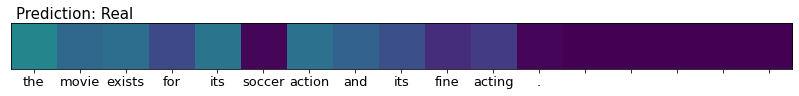

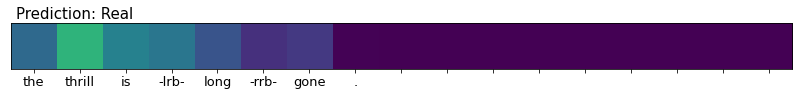

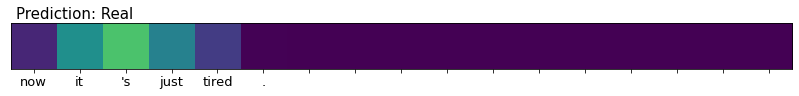

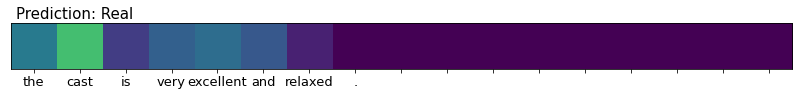

In [ ]:
MAX_ARTICLE_LENGTH = 500
CKPT = '/content/grad-cam-text/ckpt'
'''
visualize_gradcam_text(['the movie exists for its soccer action and its fine acting .',
                      'the thrill is -lrb- long -rrb- gone .',
                      "now it 's just tired .",
                      'the cast is very excellent and relaxed .'], \
                       checkpoint_path=CKPT, \
                       max_article_length=MAX_ARTICLE_LENGTH)
                       '''
visualize_gradcam_text(['the movie exists for its soccer action and its fine acting .',
                      'the thrill is -lrb- long -rrb- gone .',
                      "now it 's just tired .",
                      'the cast is very excellent and relaxed .'], \
                       max_article_length=MAX_ARTICLE_LENGTH)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpldkgy37y', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f50507ac690>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


INFO:tensorflow:Could not find trained model in model_dir: /tmp/tmpldkgy37y, running initialization to predict.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


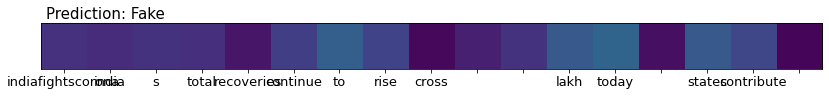

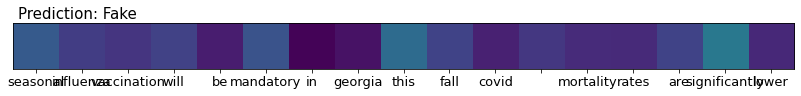

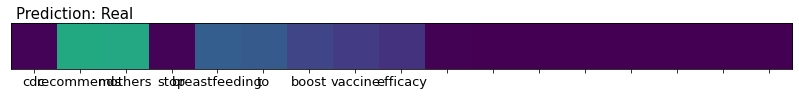

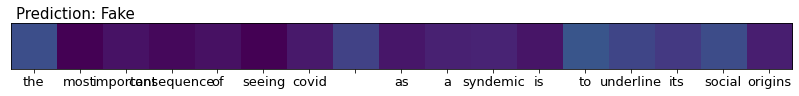

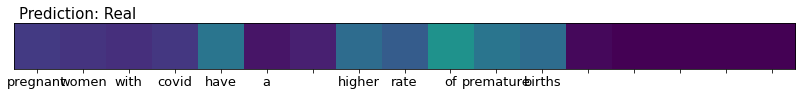

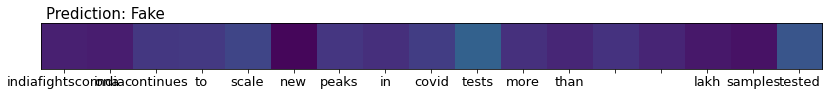

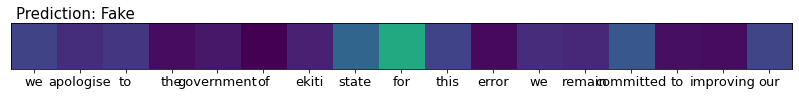

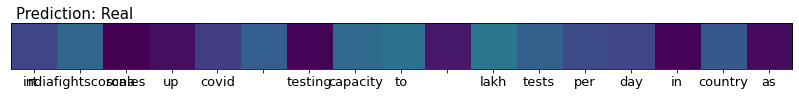

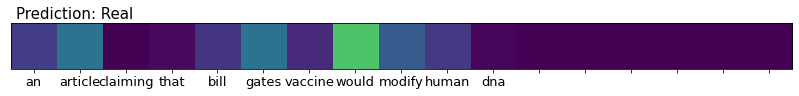

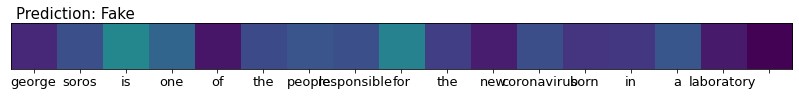

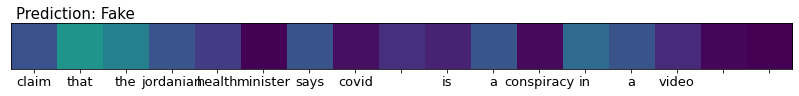

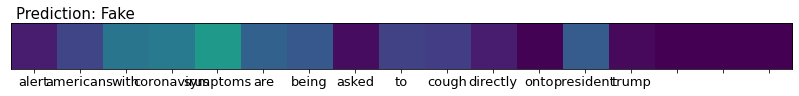

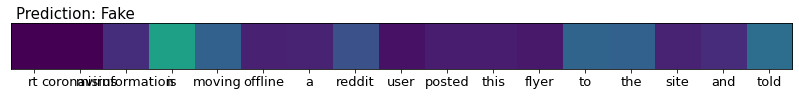

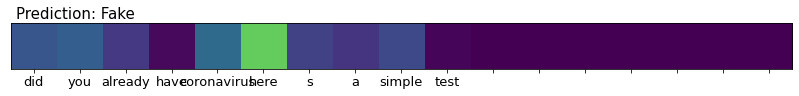

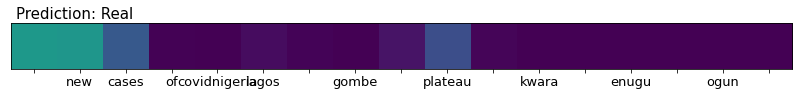

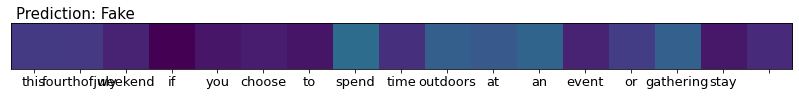

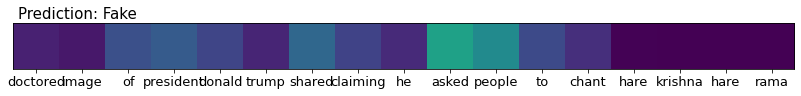

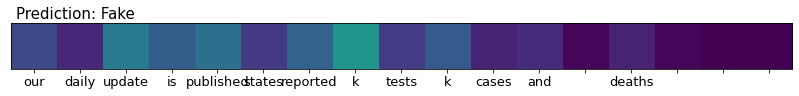

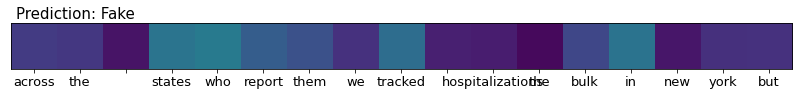

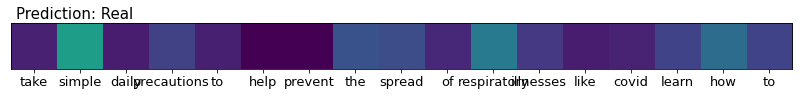

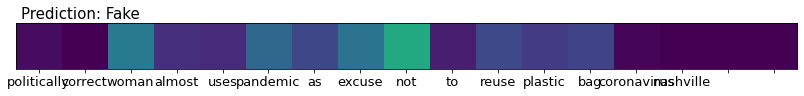

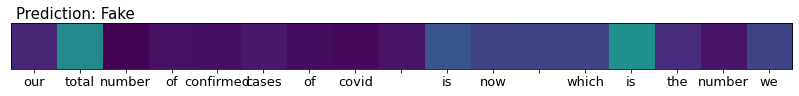

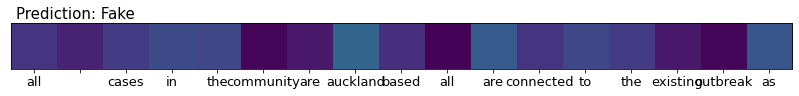

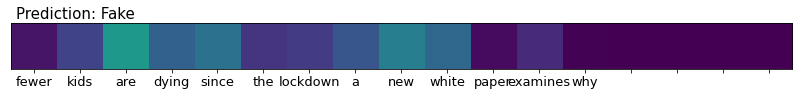

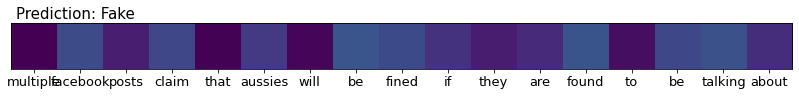

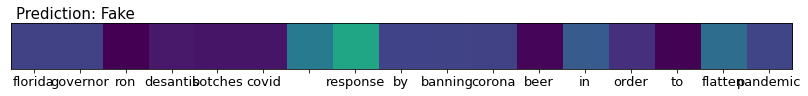

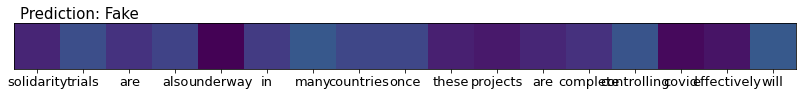

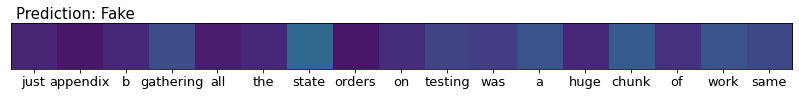

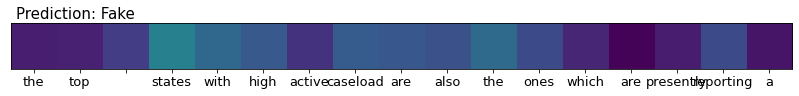

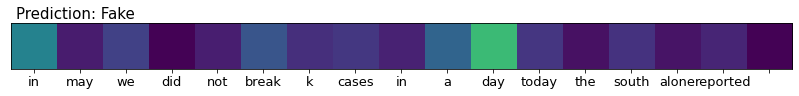

In [ ]:
visualize_gradcam_text(list(Xx_test), \
                       max_article_length=MAX_ARTICLE_LENGTH)